## Pre-requisitos

Se debe descargar los archivos:
* dima_test_wth_features_10.csv
* xgb_submit_with_feature_10_2.pickle.dat

desde el siguiente link: 

https://drive.google.com/open?id=1MJurFh9Kjd9zUevnTRylYJmTFF8Labzn

y guardarlos en los siguientes directorios:

* sets_de_datos/dima_test_wth_features_10.csv
* entrenamientos/xgb_submit_with_feature_10_2.pickle.dat

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import time
import matplotlib.pyplot as plt

In [2]:
X_test = pd.read_csv("sets_de_datos/dima_test_with_features_10.csv",
                    dtype={ \
                            'antiguedad' : np.float32, 
                            'habitaciones' : np.float32, 
                            'garages' : np.float32, 
                            'banos' : np.float32,
                            'metroscubiertos' : np.float32, 
                            'metrostotales' : np.float32, 
                            'idzona' : np.float32, 
                            'lat' : np.float32, 
                            'lng' : np.float32, 
                            'gimnasio' : np.float32, 
                            'usosmultiples' : np.float32, 
                            'piscina' : np.float32, 
                            'escuelascercanas' : np.float32,
                            'centroscomercialescercanos' : np.float32, 
                            'servicios_cercanos' : np.float32,
                            'utilidades_extra' : np.float32, 
                            'tipodepropiedad_mean_antiguedad' : np.float32,
                            'tipodepropiedad_mean_habitaciones ' : np.float32, 
                            'tipodepropiedad_mean_garages' : np.float32,
                            'tipodepropiedad_mean_banos' : np.float32, 
                            'tipodepropiedad_mean_metroscubiertos' : np.float32,
                            'tipodepropiedad_mean_utilidades_extra' : np.float32,
                            'tipodepropiedad_mean_servicios_cercanos' : np.float32, 
                            'ciudad_mean_antiguedad' : np.float32,
                            'ciudad_mean_habitaciones' : np.float32, 
                            'ciudad_mean_garages' : np.float32, 
                            'ciudad_mean_banos': np.float32,
                            'ciudad_mean_metroscubiertos' : np.float32, 
                            'ciudad_mean_utilidades_extra' : np.float32,
                            'ciudad_mean_servicios_cercanos' : np.float32, 
                            'provincia_mean_antiguedad' : np.float32,
                            'provincia_mean_habitaciones' : np.float32, 
                            'provincia_mean_garages' : np.float32,
                            'provincia_mean_banos' : np.float32, 
                            'provincia_mean_metroscubiertos' : np.float32,
                            'provincia_mean_utilidades_extra' : np.float32, 
                            'provincia_mean_servicios_cercanos' : np.float32,
                            'ciudad_mean_lat' : np.float32, 
                            'ciudad_mean_lng' : np.float32, 
                            'provincia_mean_lat' : np.float32,
                            'provincia_mean_lng' : np.float32, 
                            'producto_interno_centro_ciudad' : np.float32,
                            'producto_interno_centro_provincia' : np.float32,
                            'producto_interno_centro_pais' : np.float32, 
                            'año' : np.float32, 
                            'mes' : np.float32, 
                            'dia' : np.float32,
                            'metros_no_cubiertos' : np.float32, 
                            'cantidad_espacios' : np.float32, 
                            'metros_x_espacio' : np.float32,
                            'metros_x_habitaciones' : np.float32, 
                            'metros_x_garages' : np.float32, 
                            'metros_x_banos' : np.float32,
                            'metros_x_utilidades_extra' : np.float32, 
                            'ratio_metros_cubiertos' : np.float32, 
                            'distancia_minima_Apartamento': np.float32,
                            'distancia_minima_Bodega_comercial': np.float32,
                            'distancia_minima_Casa': np.float32,
                            'distancia_minima_Casa_en_condominio': np.float32,
                            'distancia_minima_Casa_uso_de_suelo': np.float32,
                            'distancia_minima_Departamento_Compartido': np.float32,
                            'distancia_minima_Duplex': np.float32,
                            'distancia_minima_Edificio': np.float32,
                            'distancia_minima_Garage': np.float32,
                            'distancia_minima_Hospedaje': np.float32,
                            'distancia_minima_Huerta': np.float32,
                            'distancia_minima_Inmuebles_productivos_urbanos': np.float32,
                            'distancia_minima_Local_Comercial': np.float32,
                            'distancia_minima_Local_en_centro_comercial': np.float32,
                            'distancia_minima_Lote': np.float32,
                            'distancia_minima_Nave_industrial': np.float32,
                            'distancia_minima_Oficina_comercial': np.float32,
                            'distancia_minima_Otros': np.float32,
                            'distancia_minima_Quinta_Vacacional': np.float32,
                            'distancia_minima_Rancho': np.float32,
                            'distancia_minima_Terreno': np.float32,
                            'distancia_minima_Terreno_comercial': np.float32,
                            'distancia_minima_Terreno_industrial' : np.float32,
                            'distancia_minima_promedio_ricos' : np.float32,
                            'distancia_minima_promedio_pobres' : np.float32,
                            'distancia_minima_Villa' : np.float32,
                            'distancia_centro_ciudad' : np.float32,
                            'distancia_centro_provincia' : np.float32,
                            'distancia_centro_pais' : np.float32,
                            'distancia_Distrito_Federal' : np.float32,
                            'banos_preciopromedio_ciudad' : np.float32,
                            'habitaciones_preciopromedio_ciudad' : np.float32, 
                            'garages_preciopromedio_ciudad' : np.float32,
                            'banos_preciopromedio_metroscubiertos' : np.float32,
                            'habitaciones_preciopromedio_metroscubiertos' : np.float32,
                            'garages_preciopromedio_metroscubiertos' : np.float32, 
                            'precio_x_m2' : np.float32,
                            'tipodepropiedad_mean_precio' : np.float32, 
                            'titulo_cantidad_palabras_importantes' : np.float32,
                            'descripcion_cantidad_palabras_importantes' : np.float32,
                            'direccion_cantidad_palabras_importantes' : np.float32,
                            'titulo_cantidad_caracteres_en_palabras_importantes' : np.float32,
                            'descripcion_cantidad_caracteres_en_palabras_importantes' : np.float32,
                            'direccion_cantidad_caracteres_en_palabras_importantes' : np.float32,
                            'titulo_longitud_media_de_palabra' : np.float32,
                            'descripcion_longitud_media_de_palabra' : np.float32,
                            'direccion_longitud_media_de_palabra' : np.float32, 
                            'titulo_cantidad_stopwords' : np.float32,
                            'descripcion_cantidad_stopwords' : np.float32, 
                            'direccion_cantidad_stopwords' : np.float32,
                            'titulo_cantidad_signos_puntacion' : np.float32,
                            'descripcion_cantidad_signos_puntacion' : np.float32,
                            'direccion_cantidad_signos_puntacion' : np.float32,
                            'direccion_cantidad_palabras_en_mayuscula' : np.float32,
                            'direccion_cantidad_titulos' : np.float32, 
                            'titulo_cantidad_palabras_top_k' : np.float32,
                            'descripcion_cantidad_palabras_top_k' : np.float32,
                            'direccion_cantidad_palabras_top_k' : np.float32,
                            'titulo_cantidad_palabras_bottom_k' : np.float32,
                            'descripcion_cantidad_palabras_bottom_k' : np.float32,
                            'direccion_cantidad_palabras_bottom_k' : np.float32,
                            'titulo_cantidad_prefijos_top_k' : np.float32, 
                            'descripcion_cantidad_prefijos_top_k' : np.float32,
                            'direccion_cantidad_prefijos_top_k' : np.float32, 
                            'titulo_cantidad_postfijos_top_k' : np.float32,
                            'descripcion_cantidad_postfijos_top_k' : np.float32,
                            'direccion_cantidad_postfijos_top_k' : np.float32, 
                            'categoria_descripcion_0' : np.float32, 
                            'categoria_descripcion_1' : np.float32, 
                            'categoria_descripcion_2' : np.float32, 
                            'categoria_descripcion_3' : np.float32, 
                            'categoria_descripcion_4' : np.float32, 
                            'categoria_descripcion_5' : np.float32, 
                            'categoria_descripcion_6' : np.float32,
                            'categoria_descripcion_7' : np.float32,
                            'distancia_euclideana_al_origen' : np.float32, 
                            'distancia_minima_comercial' : np.float32,
                            'producto_interno_maximo_ciudad_pais' : np.float32,
                            'ciudad_mean_antiguedad_sobre_provincia_mean_antiguedad' : np.float32,
                            'tipodepropiead_mean_utilidades_extra_sobre_ciudad_mean_utilidades_extra' : np.float32,
                            'antiguedad_sobre_tipodepropiedad_mean_antiguedad' : np.float32,
                            'direccion_cantidad_al_menos_una_mayuscula' : np.float32,
                            'direccion_cantidad_fijos_top_k' : np.float32, 
                            'titulo_cantidad_fijos_top_k' : np.float32,
                            'titulo_palabras_top_k_sobre_total_palabras' : np.float32,
                            'ciudad_distancia_al_origen':  np.float32, 
                            'ciudad_mean_mean_todas' : np.float32,
                            'ciudad_mean_antiguedad_sobre_mean_metrocubiertos' : np.float32
                            }
                    )

In [3]:
FEATURES = ['metrostotales',
            'descripcion_longitud_media_de_palabra',
            'metros_x_habitaciones',
            'metros_x_garages',
            'metros_x_banos',
            'metroscubiertos',
            'titulo_longitud_media_de_palabra',
            'metros_x_espacio',
            'titulo_cantidad_caracteres_en_palabras_importantes',
            'descripcion_cantidad_palabras_top_k',
            'distancia_minima_Casa',
            'distancia_minima_promedio_ricos',
            'idzona',
            'descripcion_cantidad_stopwords',
            'descripcion_cantidad_caracteres_en_palabras_importantes',
            'descripcion_cantidad_signos_puntacion',
            'direccion_cantidad_caracteres_en_palabras_importantes',
            'titulo_palabras_top_k_sobre_total_palabras',
            'distancia_minima_promedio_pobres',
            'antiguedad',
            'direccion_longitud_media_de_palabra',
            'habitaciones_preciopromedio_ciudad',
            'distancia_minima_Apartamento',
            'distancia_minima_Casa_en_condominio',
            'distancia_centro_ciudad',
            'lat',
            'banos_preciopromedio_ciudad',
            'distancia_minima_Terreno',
            'garages_preciopromedio_ciudad',
            'distancia_minima_Oficina_comercial',
            'producto_interno_centro_ciudad',
            'año',
            'distancia_centro_provincia',
            'distancia_minima_Local_Comercial',
            'descripcion_cantidad_prefijos_top_k',
            'distancia_minima_Rancho',
            'distancia_minima_Bodega_comercial',
            'distancia_minima_Terreno_comercial',
            'distancia_minima_Departamento_Compartido',
            'descripcion_cantidad_palabras_importantes',
            'distancia_minima_Villa',
            'titulo_cantidad_fijos_top_k',
            'descripcion_cantidad_postfijos_top_k',
            'distancia_minima_Quinta_Vacacional',
            'distancia_minima_Otros',
            'distancia_minima_Duplex',
            'distancia_minima_Lote',
            'distancia_minima_Casa_uso_de_suelo',
            'distancia_minima_Edificio',
            'habitaciones_preciopromedio_metroscubiertos',
            'lng',
            'precio_x_m2',
            'cantidad_espacios',
            'ciudad_mean_mean_todas',
            'distancia_minima_Local_en_centro_comercial',
            'distancia_Distrito_Federal',
            'distancia_minima_Inmuebles_productivos_urbanos']

In [4]:
X_test.set_index('id', inplace = True)

In [5]:
xgb_regressor = pickle.load(open("entrenamientos/xgb_submit_with_features_10_2.pickle.dat", "rb"))

In [6]:
t0 = time.time()
y_kaggle_pred = xgb_regressor.predict(X_test[FEATURES])
t1 = time.time()
print('tiempo = {0:.2f} minutos'.format((t1-t0)/60))

tiempo = 0.02 minutos


In [7]:
res = pd.DataFrame(y_kaggle_pred, index=X_test.index, columns=['target'])
res.to_csv("submits/submit_xgboost_with_features_10_2.csv", header=True)

In [8]:
def plot_importance(modelo):
  feat_imp_1 = pd.Series(modelo.get_booster().get_fscore()).sort_values(ascending=False)
  feat_imp_1.plot(kind='barh', title='Feature Importances', figsize=(15, 15))
  plt.ylabel('Feature Importance Score')
  plt.show()
  return feat_imp_1

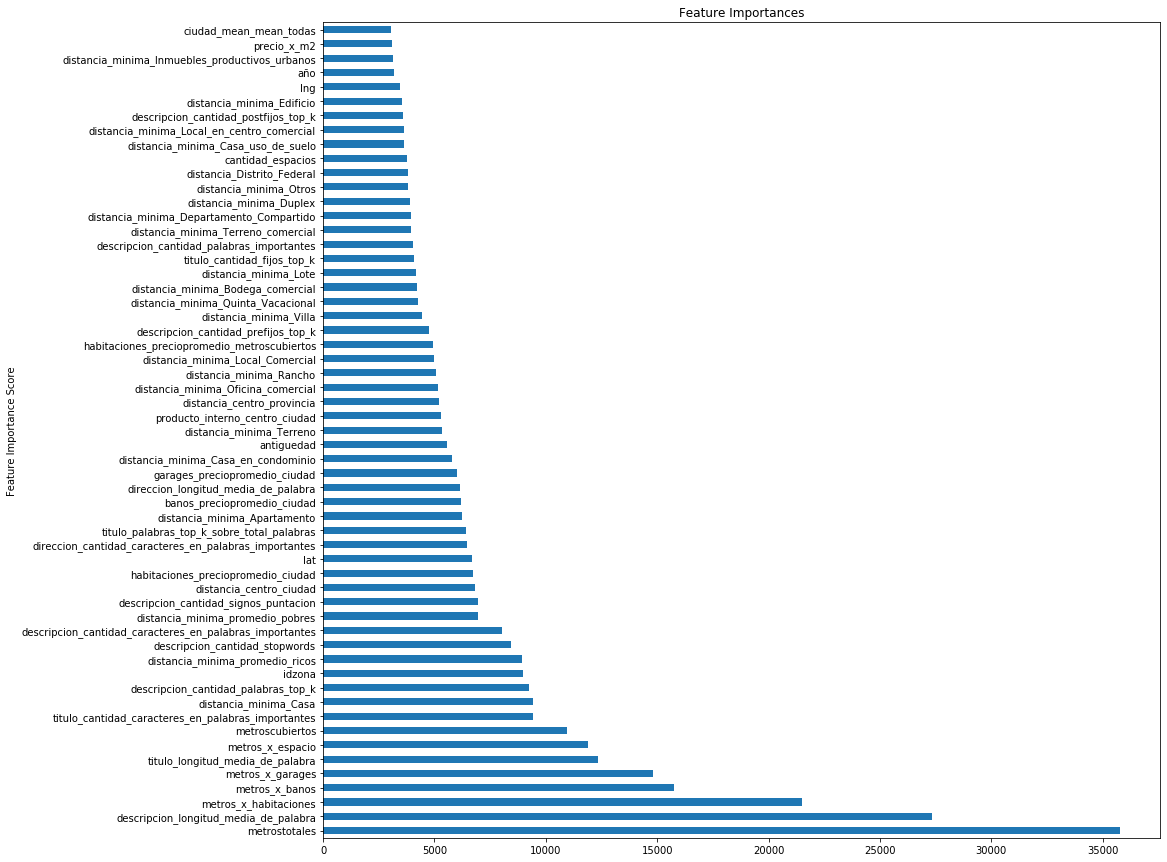

metrostotales                                              35788
descripcion_longitud_media_de_palabra                      27342
metros_x_habitaciones                                      21517
metros_x_banos                                             15733
metros_x_garages                                           14825
titulo_longitud_media_de_palabra                           12326
metros_x_espacio                                           11881
metroscubiertos                                            10951
titulo_cantidad_caracteres_en_palabras_importantes          9446
distancia_minima_Casa                                       9404
descripcion_cantidad_palabras_top_k                         9230
idzona                                                      8989
distancia_minima_promedio_ricos                             8942
descripcion_cantidad_stopwords                              8444
descripcion_cantidad_caracteres_en_palabras_importantes     8053
distancia_minima_promedio

In [9]:
plot_importance(xgb_regressor)

In [10]:
X_test[FEATURES].shape

(60000, 57)